In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

1.1 Visualizing the data

In [52]:
data2 = np.loadtxt('ex2data1.txt', delimiter=',')

x = data2[:,:2]
y = data2[:,2]#[np.newaxis].T
print(x.shape, y.shape)

(100, 2) (100,)


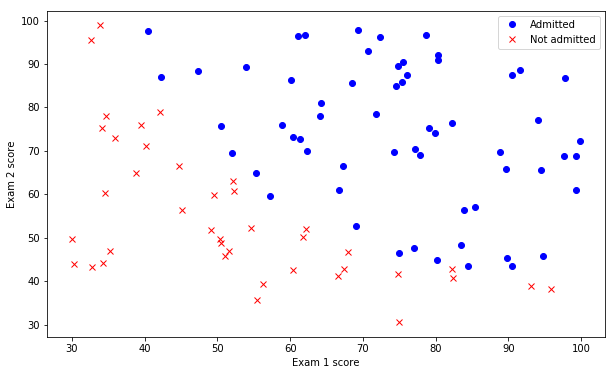

In [53]:
pos = y == 1
neg = y == 0

plt.figure(figsize=(10,6))
plt.plot(x[pos, 0], x[pos, 1],'bo')
plt.plot(x[neg, 0], x[neg, 1], 'rx')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

1.2 Implementation

Inserting a column of 1's in the x array

In [54]:
x = np.insert(x, 0, 1, axis=1)

Creating the logistic cost function. I did it in a two step processes, creating a sigmoid function and then the actual cost function

In [56]:
def sigmoid(z):
    g = 1/(1+np.exp(z))
    return g

def cost(theta, x, y):
    h = sigmoid(np.dot(x, theta)) 
    cost = -1*(1/m) * (np.dot(np.log(h).T, y) + np.dot(np.log(1-h).T, 1-y))
    return cost

Creates the gradient descent of the regression.

In [57]:
def gradient(theta, x, y):
    h = sigmoid(np.dot(x, theta))
    
    gradient = (1/m) * np.dot(x.T, (h-y))
    return gradient

Testing the cost function and gradient descent.

In [58]:
initial_theta = np.zeros(n+1)
print('gradient at zeros:', gradient(initial_theta, x, y))
print('cost at zeros:', cost(initial_theta, x, y))

gradient at zeros: [ -0.1        -12.00921659 -11.26284221]
cost at zeros: 0.6931471805599453


In [59]:
type(initial_theta)

numpy.ndarray

In [60]:
type(x)

numpy.ndarray

Using scipy optimize to do the same thing as above. This is simpler.

In [81]:
def sci_opt(theta, in_x, in_y):
    res = optimize.fmin(cost,
                        theta,
                        args = (in_x, in_y),    
                        maxiter = 400,
                        full_output = True)
    return res[0], res[1]

In [82]:
theta_sci, cost_sci = sci_opt(initial_theta, x, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 169
         Function evaluations: 290


In [83]:
cost(theta_sci, x, y)

0.20349770159225464